### Name: Chahak
### Task 6: Prediction Using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check the value count of Species
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

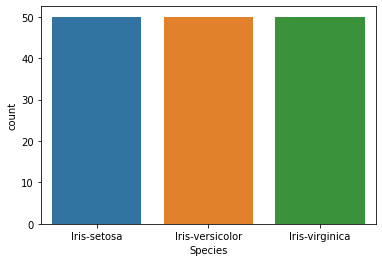

In [8]:
sns.countplot(x="Species", data=df)

#### The data is not imbalanced

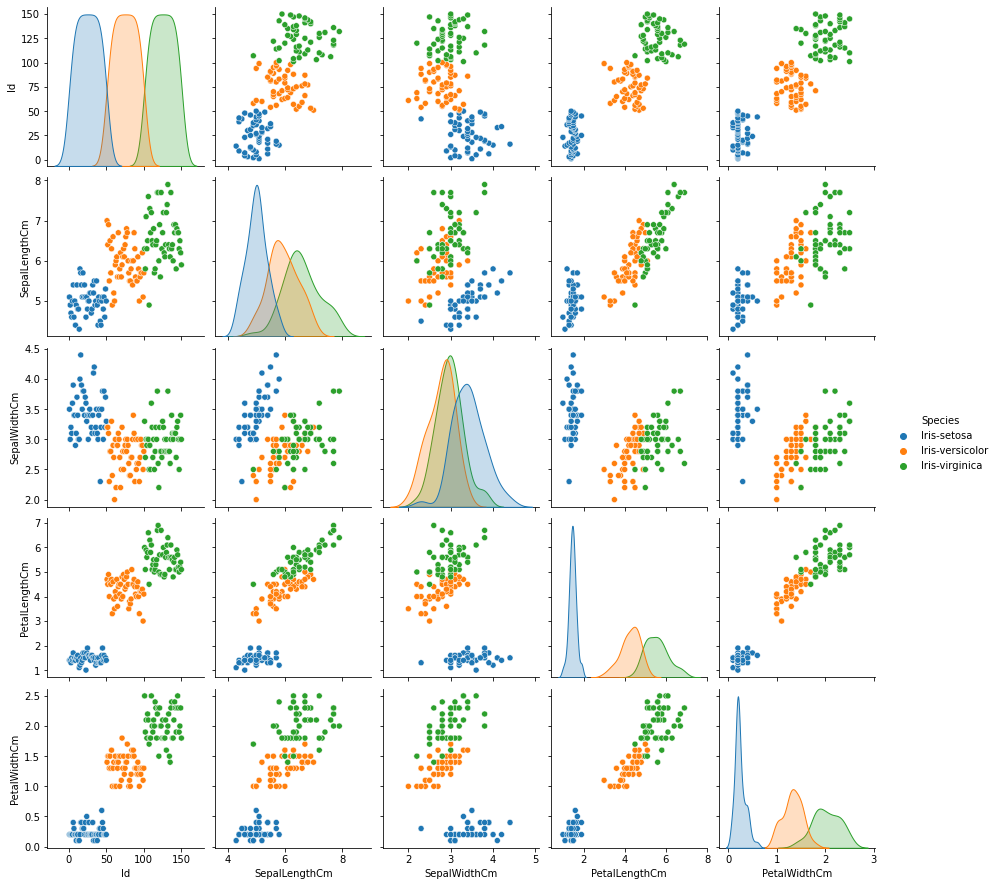

In [9]:
sns.pairplot(df.iloc[:,:], hue = "Species")

In [10]:
df.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [12]:
# lets drop "Id" column as it is not useful 
df.drop(["Id"], axis=1, inplace=True)

In [13]:
# label Encoding for the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Species"]) 
df["Species"] = le.transform(df["Species"])

In [14]:
df['Species'].unique()

array([0, 1, 2])

In [15]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

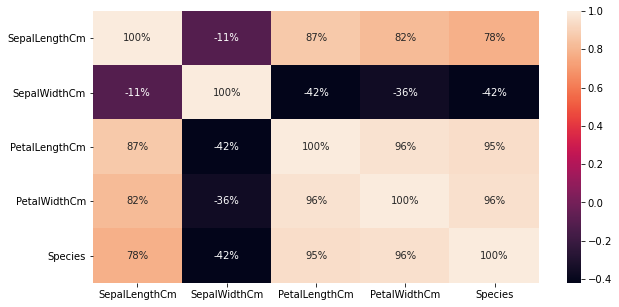

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

#### From the above heatmap, it is clear that PetalLengthCm, PetalWidthCm are the highly correlated ones with the target variable i.e. Species

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

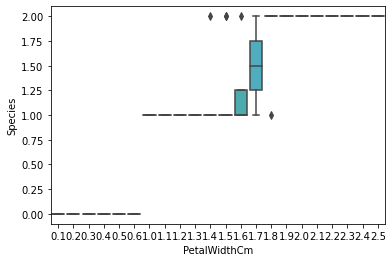

In [17]:
# Let's visualize individual variables with the Species
# PetalWidthCm vs Species
sns.boxplot(x="PetalWidthCm", y="Species", data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

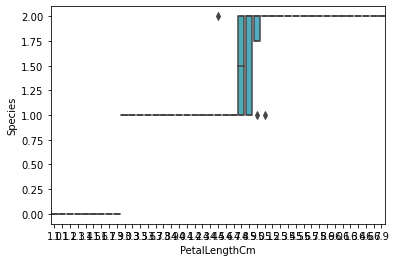

In [18]:
# PetalLengthCm vs Species
sns.boxplot(x="PetalLengthCm", y="Species", data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

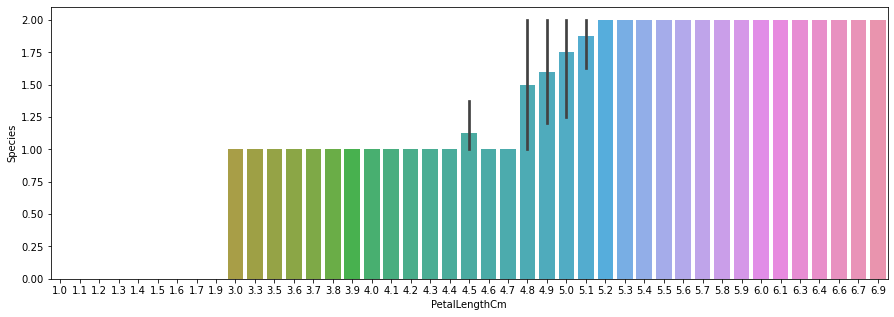

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x="PetalLengthCm", y="Species", data=df)
# The petal length is from 3.0 to 6.9 in cm

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

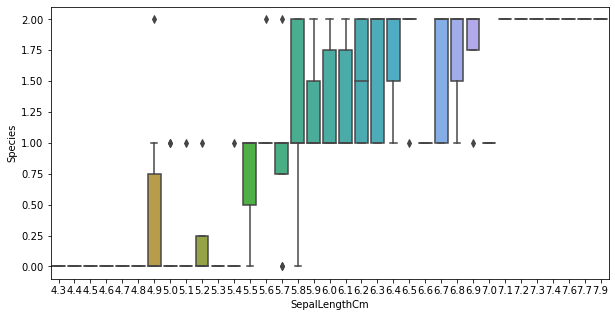

In [20]:
# SepalLengthCm vs Species
plt.figure(figsize=(10,5))
sns.boxplot(x="SepalLengthCm", y="Species", data=df)

#### From the boxplots, we can see the outliers but since DT are robust to outliers so there's no need to work on them

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

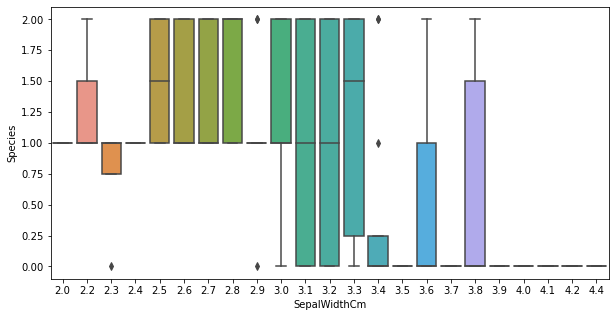

In [21]:
# SepalWidthCm vs Species
plt.figure(figsize=(10,5))
sns.boxplot(x="SepalWidthCm", y="Species", data=df)

In [22]:
# Feature Selection
# chi square test
from sklearn.feature_selection import chi2
X = df.drop('Species',axis=1)
Y = df['Species']

In [23]:
chi_scores = chi2(X,Y)

In [24]:
chi_scores

(array([ 10.81782088,   3.59449902, 116.16984746,  67.24482759]),
 array([4.47651499e-03, 1.65754167e-01, 5.94344354e-26, 2.50017968e-15]))

In [25]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

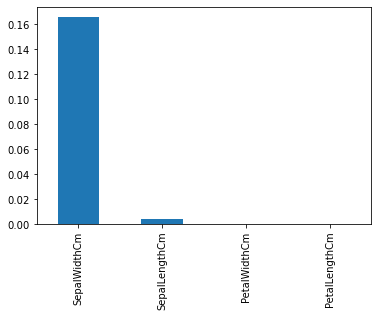

In [26]:
p_values.plot.bar()

#### SepalWidthCm is the least important feature

In [27]:
X = df.drop(['SepalWidthCm', 'Species'], axis=1)

In [28]:
X

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [29]:
#Split the data into 80% training and 20% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [30]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Creating an standardscaler object
std_slc = StandardScaler()

# Creating a pca object
pca = decomposition.PCA()

# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

# Creating a pipeline of three steps. First, standardizing the data.
# Second, tranforming the data with PCA.
# Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dec_tree', dec_tree)])

# Creating Parameter Space
n_components = list(range(1,X_train.shape[1]+1,1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

# Creating a dictionary of all the parameter options 
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 2

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_split=2, min_samples_leaf=2,
                              max_features='auto',  max_depth=4, random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_leaf=2, random_state=0, splitter='random')

In [32]:
print("Decision Tree Classifier Training Accuracy: ",tree.score(X_train, Y_train))

Decision Tree Classifier Training Accuracy:  0.8916666666666667


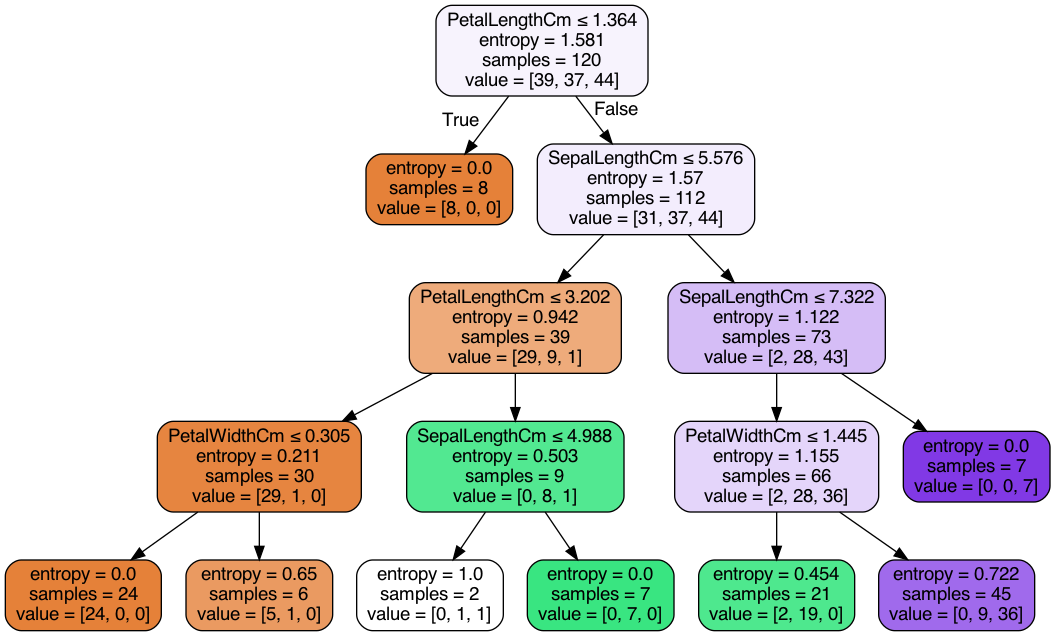

In [33]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
y_pred = tree.predict(X_test)

In [35]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [36]:
#test model accuracy on test data
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.62      0.73        13
           2       0.50      0.83      0.62         6

    accuracy                           0.80        30
   macro avg       0.80      0.82      0.78        30
weighted avg       0.85      0.80      0.81        30

0.8


<AxesSubplot:>

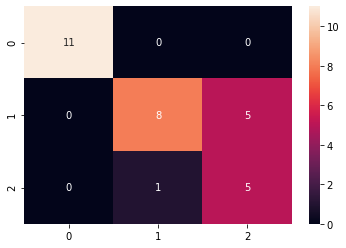

In [37]:
sns.heatmap(metrics.confusion_matrix(Y_test, y_pred), annot = True)